In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

# Análisis inicial

In [2]:
#Se leen los datos
data = pd.read_csv('sample.csv')

In [3]:
#Se visualizan las 5 primeras columnas
data.head()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,115.0,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417


In [4]:
#Se mira la informacion del set de datos 
#número de columnas y filas, nombre de las columnas, datos nulos (en las columnas latitud y longitud), tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   producto         1999 non-null   object 
 1   presentacion     1999 non-null   object 
 2   marca            1999 non-null   object 
 3   categoria        1999 non-null   object 
 4   catalogo         1999 non-null   object 
 5   precio           1999 non-null   float64
 6   fechaRegistro    1999 non-null   object 
 7   cadenaComercial  1999 non-null   object 
 8   giro             1999 non-null   object 
 9   nombreComercial  1999 non-null   object 
 10  direccion        1999 non-null   object 
 11  estado           1999 non-null   object 
 12  municipio        1999 non-null   object 
 13  latitud          1229 non-null   float64
 14  longitud         1229 non-null   float64
dtypes: float64(3), object(12)
memory usage: 234.4+ KB


In [5]:
#Se limpian los espacios de la columna municio
data['municipio'] = data['municipio'].str.replace(' ','')

In [6]:
#Se valida cuales municipios tienen la longitud nula
data[data['longitud'].isnull()].municipio.unique()

array(['ATIZAPAN'], dtype=object)

In [7]:
#Se valida cuales municipios tienen la latitud nula
data[data['latitud'].isnull()].municipio.unique()

array(['ATIZAPAN'], dtype=object)

In [8]:
#Se completa la información de latitud y longitud de dataset
data['latitud'] = data['latitud'].fillna(19.5562)
data['longitud'] = data['longitud'].fillna(-99.2675)

In [9]:
#Se valida que se completó la información 
data[data['municipio']== 'ATIZAPAN'].head(3)

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
9,PAN BLANCO BOLILLO,PIEZA,S/M,PAN,BASICOS,1.20,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL VILLAS DE LA HACIENDA,AV. LAGO DE GUADALUPE S/N ESQ. DE LAS VILLAS,MÉXICO,ATIZAPAN,19.5562,-99.2675
10,HARINA HOT CAKES,CAJA 800 GR.,PRONTO TRADICIONALES,GALLETAS PASTAS Y HARINAS DE TRIGO,BASICOS,21.63,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL VILLAS DE LA HACIENDA,AV. LAGO DE GUADALUPE S/N ESQ. DE LAS VILLAS,MÉXICO,ATIZAPAN,19.5562,-99.2675
11,PASTA PARA SOPA,PAQUETE 200 GR. SPAGHETTI,VESTA,GALLETAS PASTAS Y HARINAS DE TRIGO,BASICOS,3.45,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL VILLAS DE LA HACIENDA,AV. LAGO DE GUADALUPE S/N ESQ. DE LAS VILLAS,MÉXICO,ATIZAPAN,19.5562,-99.2675


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   producto         1999 non-null   object 
 1   presentacion     1999 non-null   object 
 2   marca            1999 non-null   object 
 3   categoria        1999 non-null   object 
 4   catalogo         1999 non-null   object 
 5   precio           1999 non-null   float64
 6   fechaRegistro    1999 non-null   object 
 7   cadenaComercial  1999 non-null   object 
 8   giro             1999 non-null   object 
 9   nombreComercial  1999 non-null   object 
 10  direccion        1999 non-null   object 
 11  estado           1999 non-null   object 
 12  municipio        1999 non-null   object 
 13  latitud          1999 non-null   float64
 14  longitud         1999 non-null   float64
dtypes: float64(3), object(12)
memory usage: 234.4+ KB


# Preguntas

How many commercial chains are monitored, and therefore, included in this database?

In [16]:
n_cadenas = data.cadenaComercial.nunique()

print('There is {n} chains monitored'.format(n=n_cadenas))

There is 4 chains monitored


What are the top 10 monitored products by State?

In [17]:
data.groupby('estado')['producto'].value_counts().groupby(level=0, group_keys=False).head(10)

estado            producto               
DISTRITO FEDERAL  DETERGENTE P/ROPA          25
                  LECHE ULTRAPASTEURIZADA    23
                  REFRESCO                   22
                  CHILES EN LATA             21
                  MAYONESA                   20
                  SHAMPOO                    18
                  TELEVISORES                17
                  GALLETAS DULCES            16
                  JABON DE TOCADOR           16
                  FUD                        14
MÉXICO            REFRESCO                   26
                  DETERGENTE P/ROPA          24
                  SHAMPOO                    19
                  CHILES EN LATA             18
                  LECHE ULTRAPASTEURIZADA    17
                  MAYONESA                   17
                  TOALLA FEMENINA            17
                  DESODORANTE                15
                  TELEVISORES                15
                  YOGHURT                    1

Which is the commercial chain with the highest number of monitored products?

In [18]:
x = data.groupby('cadenaComercial')['producto'].nunique().sort_values(ascending=False).to_frame().reset_index()

In [19]:
x

,cadenaComercial,producto
0,COMERCIAL MEXICANA,310
1,WAL-MART,159
2,I.S.S.S.T.E.,73
3,ABASTECEDORA LUMEN,6


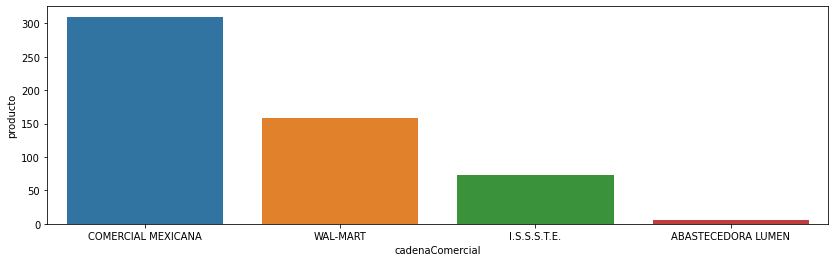

In [21]:
fix, ax = pyplot.subplots(figsize=(14,4))
ax = sns.barplot(x='cadenaComercial',y='producto',data=x)

In [22]:
cadena = data.groupby('cadenaComercial')['producto'].nunique().sort_values(ascending=False).head(1).index[0]

In [23]:
print('The commercial chain with the highest number of monitores products is {cc} '.format(cc=cadena))

The commercial chain with the highest number of monitores products is COMERCIAL MEXICANA 


Use the data to find an interesting fact.

In [24]:
#Ventas por municipio
data.groupby('municipio')['precio'].sum().sort_values(ascending=False)

municipio
ATIZAPAN        263551.75
BENITOJUAREZ    239555.75
NAUCALPAN        79717.22
IZTACALCO         4383.44
TLALPAN            389.80
Name: precio, dtype: float64

In [25]:
#Marcas por cadena comercial
data.groupby('cadenaComercial')['marca'].nunique().sort_values(ascending=False)

cadenaComercial
COMERCIAL MEXICANA    375
WAL-MART              156
I.S.S.S.T.E.          116
ABASTECEDORA LUMEN      7
Name: marca, dtype: int64

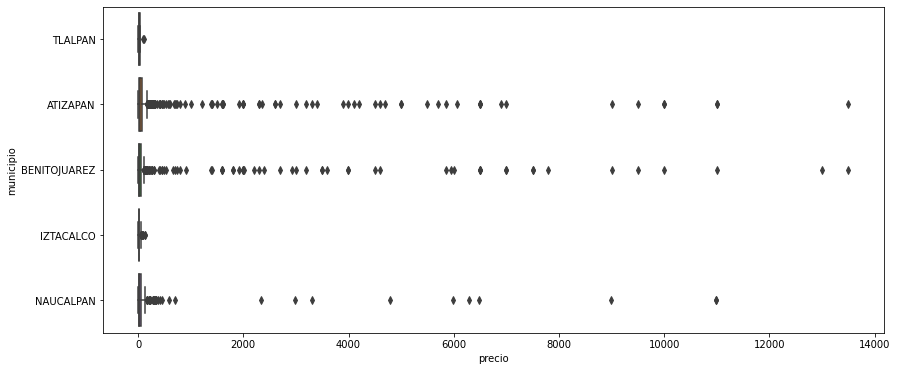

In [35]:
#Precios por municipio
fix, ax = pyplot.subplots(figsize=(14,6))
sns.boxplot(x="precio", y="municipio",
            data=data)

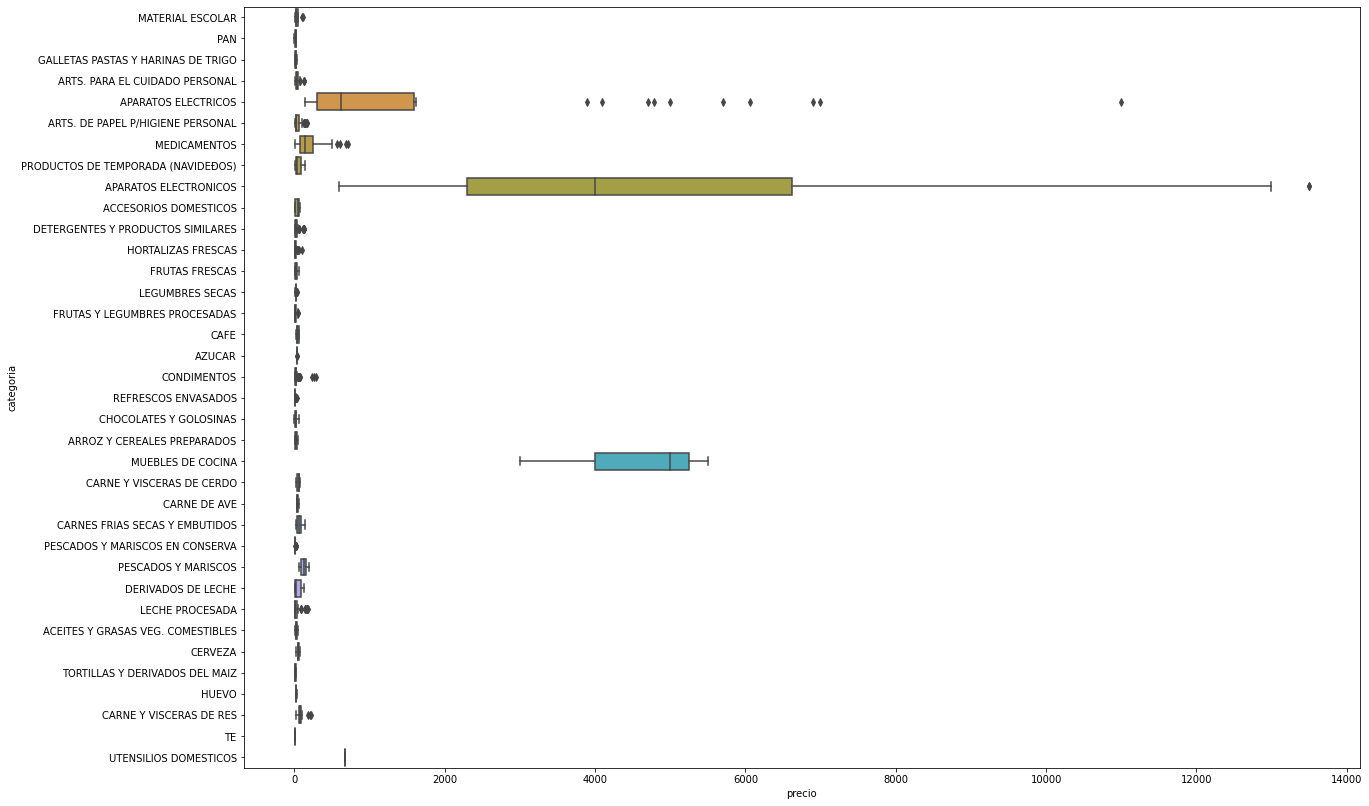

In [60]:
#Precio por categoría
fix, ax = pyplot.subplots(figsize=(20,14))
sns.boxplot(x="precio", y="categoria",
            data=data)

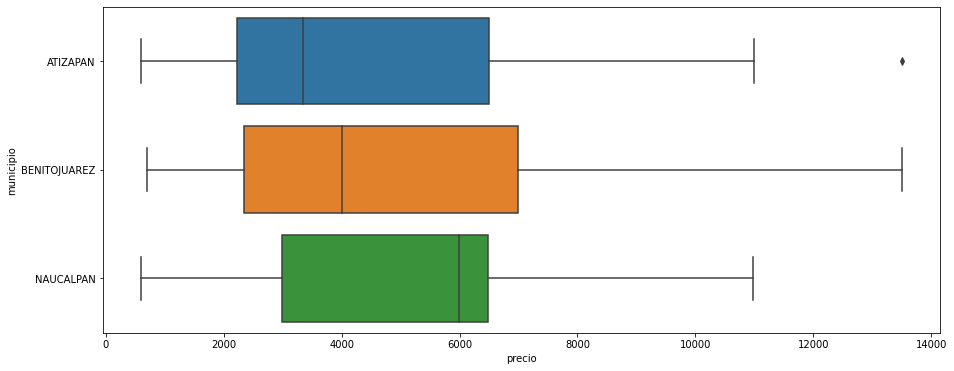

In [58]:
#Análisis de la categoría aparatos electrónicos
fix, ax = pyplot.subplots(figsize=(15,6))
sns.boxplot(x="precio", y="municipio",
            data=data[data.categoria=='APARATOS ELECTRONICOS'])

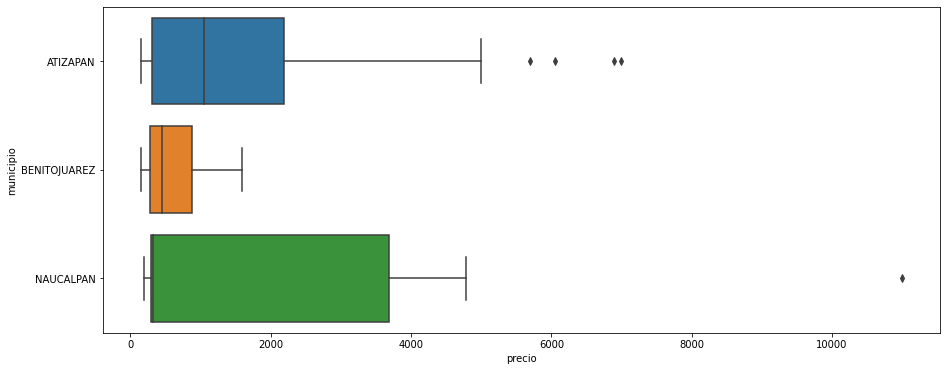

In [62]:
fix, ax = pyplot.subplots(figsize=(15,6))
sns.boxplot(x="precio", y="municipio",
            data=data[data.categoria=='APARATOS ELECTRICOS'])

In [ ]:
#Analisis de categorías vs precio

In [151]:
precio = data.groupby(['municipio','categoria']).precio.sum().to_frame()
cate = cate = data.groupby(['municipio']).categoria.value_counts().groupby(level=0, group_keys=False).head(3).to_frame()

In [152]:
final = pd.merge(cate,precio, left_index=True, right_index=True, how='left')
final.rename(columns={'categoria':'conteo_Cat'},inplace=True)

In [153]:
final

conteo_Cat    precio
municipio    categoria                                              
ATIZAPAN     MEDICAMENTOS                               76  14372.82
             ARTS. PARA EL CUIDADO PERSONAL             74   2603.03
             CARNES FRIAS SECAS Y EMBUTIDOS             54   3659.44
BENITOJUAREZ ARTS. PARA EL CUIDADO PERSONAL             79   2821.35
             CARNES FRIAS SECAS Y EMBUTIDOS             62   4193.07
             DETERGENTES Y PRODUCTOS SIMILARES          47   1326.55
IZTACALCO    DETERGENTES Y PRODUCTOS SIMILARES          23    493.90
             FRUTAS Y LEGUMBRES PROCESADAS              22    290.74
             ARTS. PARA EL CUIDADO PERSONAL             20    578.33
NAUCALPAN    MEDICAMENTOS                               31   6579.89
             ARTS. PARA EL CUIDADO PERSONAL             24    944.34
             FRUTAS Y LEGUMBRES PROCESADAS              21    328.90
TLALPAN      MATERIAL ESCOLAR                            9    389.80

What are the lessons learned from this exercise?





Can you identify other ways to approach this problem? Explain.


# Lectura de dataset completo

In [ ]:
!pip install PyDrive

#Import modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':"1crFR4yrS_6DV3_Fh-HrhANJg1-qlyE-O"})   
downloaded.GetContentFile('profeco.zip')     

In [ ]:
import pandas as pd

In [ ]:
#Unzip data
import zipfile

zf = zipfile.ZipFile('profeco.zip') 

all_data = pd.read_csv(zf.open('all_data.csv'))

['all_data.csv']

In [ ]:
#Se lee la data en chunks
chunk = pd.read_csv(zf.open('all_data.csv'),chunksize=10000)
pd_df = pd.concat(chunk)

In [ ]:
#Se convierte a parquet
pd_df.to_parquet('df.parquet.gzip',
              compression='gzip') 


In [ ]:
#Se leen los datos

my_data = pd.read_parquet('df.parquet.gzip')  

print(my_data.head())

Por google colab no fue posible, se realiza de forma local.